# Balanced Case

Inputs balanceados, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito estáveis, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") equilibradas.

## Inputs

In [1]:
%run 1.inputs.ipynb

Edges Inputs salvo em ../datasets/edges_input.csv
Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [2]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [3]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.5760     0.9022       0.9259    
10       0.2681     0.9682       0.9673    
20       0.1154     0.9741       0.9738    
30       0.0696     0.9781       0.9779    
40       0.0556     0.9805       0.9805    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [4]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-38    2.0   13     0.38   1        Bom      1.00      
-39    2.8   34     0.11   1        Bom      1.00      
-64    5.1   42     0.39   0        Ruim     0.93      
-60    2.1   13     0.25   1        Bom      1.00      
-64    9.4   53     0.55   0        Ruim     1.00      
-67    6.1   69     0.71   0        Ruim     1.00      
-38    2.3   12     0.10   1        Bom      1.00      
-63    1.8   17     0.36   1        Bom      0.99      
-31    1.6   12     0.29   1        Bom      1.00      
-51    1.9   25     0.34   1        Bom      0.99      
-57    3.7   33     0.28   1        Bom      0.93      
-61    2.0   34     0.32   1        Bom      0.97      
-52    2.9   17     0.37   1        Bom      0.99      
-63    1.4   30     0.01   1        Bom      1.00      
-64    2.6   36     0.11   1        Bom      0.99      
-50    2.0   6      0.21   1        Bom      1.0

## Fusion

In [5]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-38    2.0   13     0.38   0.71   0.76   0.74   1        Bom      0.84      
-39    2.8   34     0.11   0.66   0.64   0.79   1        Bom      0.80      
-64    5.1   42     0.39   0.50   0.69   0.46   0        Ruim     0.63      
-60    2.1   13     0.25   0.86   0.85   0.80   1        Bom      0.91      
-64    9.4   53     0.55   0.67   0.75   0.66   0        Ruim     0.58      
-67    6.1   69     0.71   0.86   0.86   0.84   1        Bom      0.51      
-38    2.3   12     0.10   0.76   0.85   0.83   1        Bom      0.89      
-63    1.8   17     0.36   0.83   0.83   0.79   1        Bom      0.89      
-31    1.6   12     0.29   0.65   0.65   0.62   1        Bom      0.79      
-51    1.9   25     0.34   0.60   0.59   0.51   1        Bom      0.75      
-57    3.7   33     0.28   0.95   0.88   0.74   1        Bom      0.90      
-61  

## Kalman

In [6]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-38    2.0   13     0.38   0.71   0.76   0.74   1        Bom      0.84      
-39    2.8   34     0.11   0.66   0.64   0.79   1        Bom      0.80      
-64    5.1   42     0.39   0.50   0.69   0.46   1        Bom      0.59      
-60    2.1   13     0.25   0.86   0.85   0.80   1        Bom      0.70      
-64    9.4   53     0.55   0.67   0.75   0.66   1        Bom      0.62      
-67    6.1   69     0.71   0.86   0.86   0.84   1        Bom      0.60      
-38    2.3   12     0.10   0.76   0.85   0.83   1        Bom      0.65      
-63    1.8   17     0.36   0.83   0.83   0.79   1        Bom      0.69      
-31    1.6   12     0.29   0.65   0.65   0.62   1        Bom      0.71      
-51    1.9   25     0.34   0.60   0.59   0.51   1        Bom      0.71      
-57    3.7   33     0.28   0.95   0.88   0.74   1        Bom      0.74      


## Results

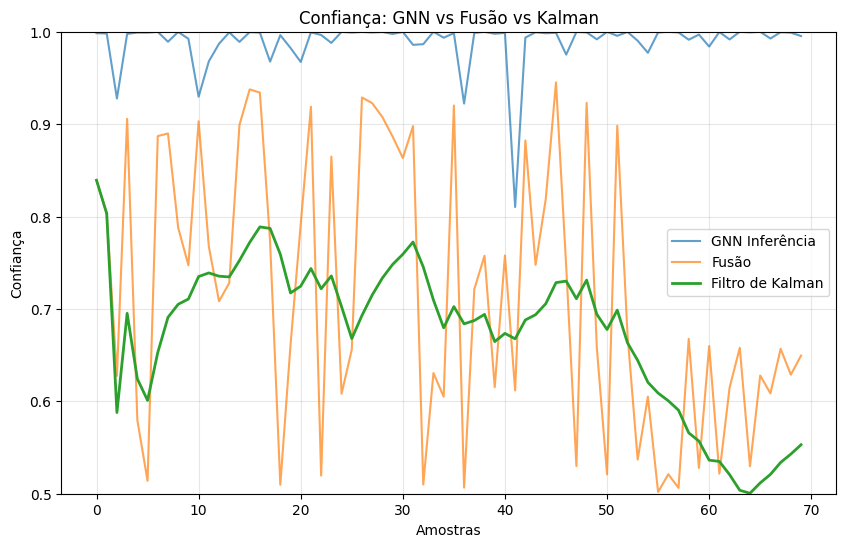

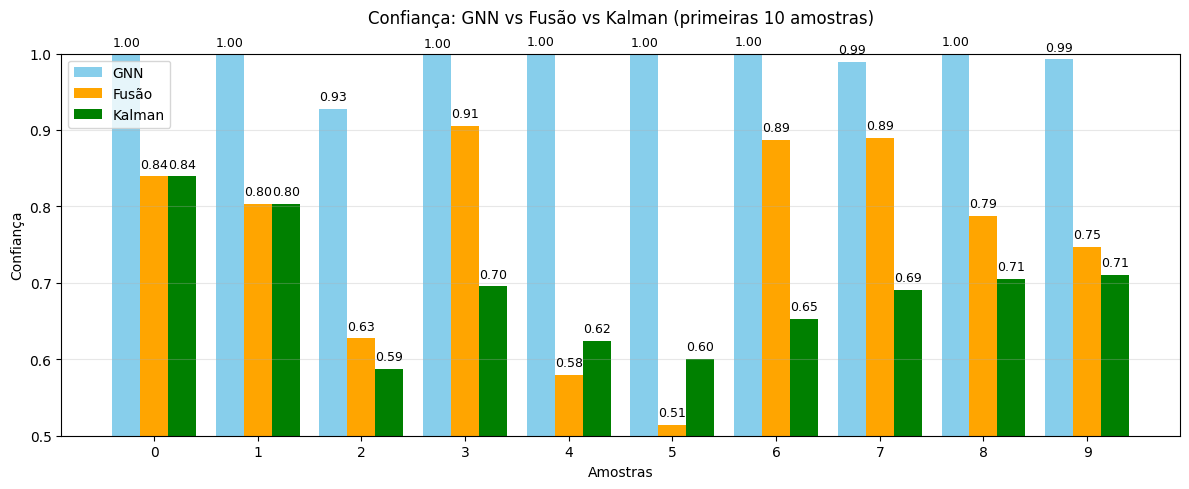

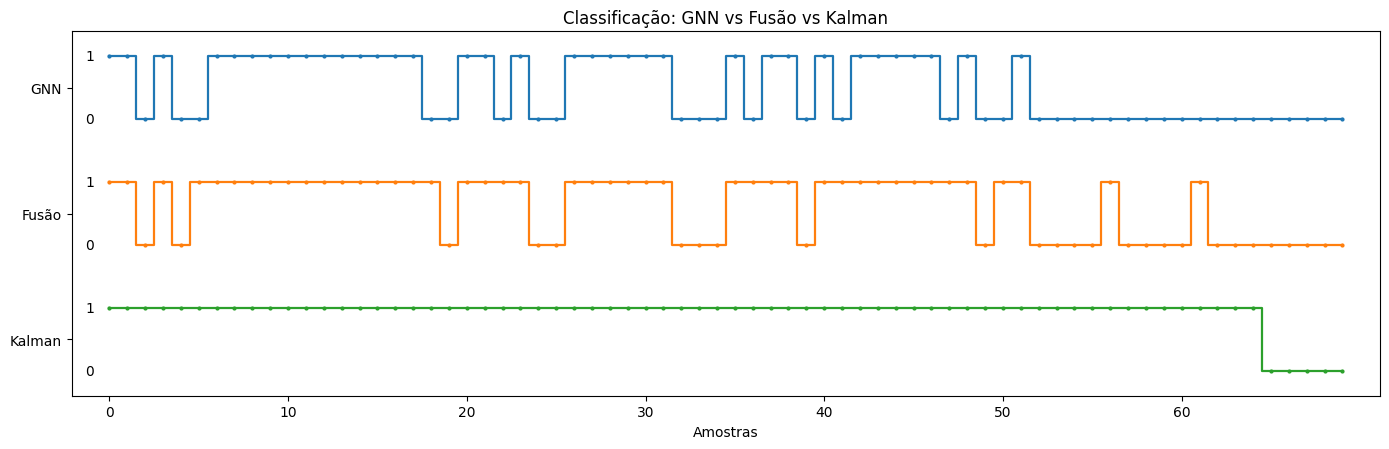

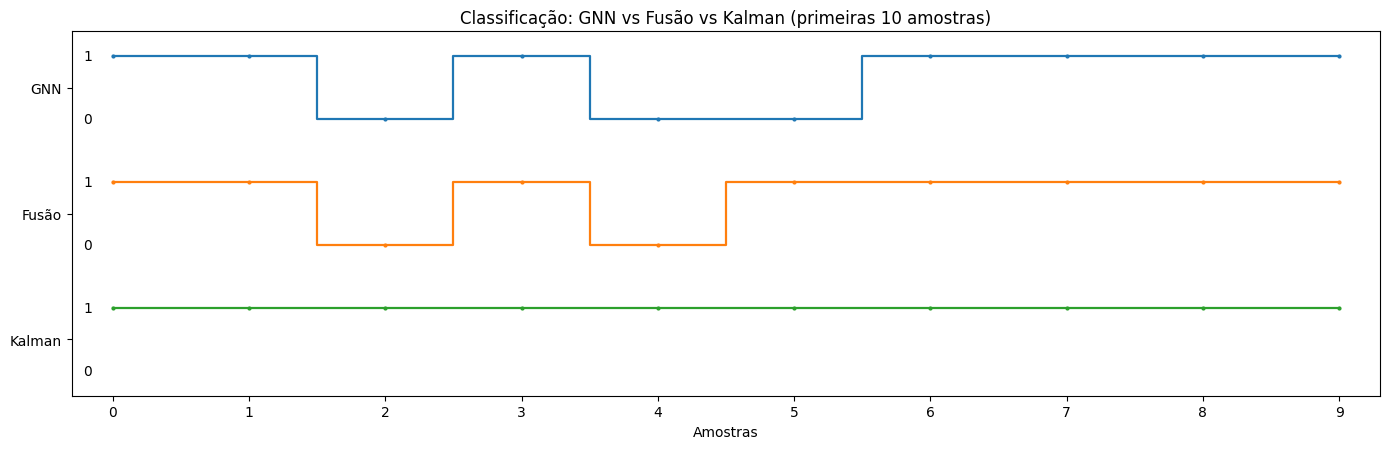

In [7]:
%run 7.results.ipynb

# Worst Case

Inputs péssimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") baixas.

## Inputs

### Imports

In [8]:
import os
import pandas as pd
import numpy as np

### Parameters

In [9]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [10]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [11]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [12]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [13]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [14]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [15]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7145     0.5000       0.5000    
10       0.3492     0.9288       0.9385    
20       0.1507     0.9715       0.9732    
30       0.0799     0.9775       0.9785    
40       0.0593     0.9799       0.9807    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [16]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-81    5.0   74     0.87   0        Ruim     1.00      
-86    4.1   84     0.52   0        Ruim     1.00      
-89    7.1   38     0.48   0        Ruim     0.99      
-90    8.7   80     0.93   0        Ruim     1.00      
-82    8.3   73     0.59   0        Ruim     1.00      
-78    6.6   41     0.98   0        Ruim     1.00      
-65    8.4   82     0.79   0        Ruim     1.00      
-73    6.8   91     0.41   0        Ruim     1.00      
-90    9.1   88     0.32   0        Ruim     1.00      
-74    8.4   65     0.85   0        Ruim     1.00      
-75    4.5   45     0.82   0        Ruim     1.00      
-89    9.3   74     0.87   0        Ruim     1.00      
-87    9.7   60     0.89   0        Ruim     1.00      
-74    4.8   35     0.43   0        Ruim     0.94      
-62    7.1   62     0.83   0        Ruim     1.00      
-78    5.8   97     0.42   0        Ruim     1.0

## Fusion

In [17]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-81    5.0   74     0.87   0.59   0.59   0.65   0        Ruim     0.64      
-86    4.1   84     0.52   0.57   0.68   0.50   0        Ruim     0.64      
-89    7.1   38     0.48   0.45   0.53   0.54   0        Ruim     0.70      
-90    8.7   80     0.93   0.55   0.63   0.59   0        Ruim     0.65      
-82    8.3   73     0.59   0.47   0.50   0.57   0        Ruim     0.70      
-78    6.6   41     0.98   0.63   0.56   0.48   0        Ruim     0.65      
-65    8.4   82     0.79   0.57   0.64   0.60   0        Ruim     0.64      
-73    6.8   91     0.41   0.56   0.59   0.60   0        Ruim     0.65      
-90    9.1   88     0.32   0.46   0.55   0.46   0        Ruim     0.70      
-74    8.4   65     0.85   0.50   0.58   0.59   0        Ruim     0.67      
-75    4.5   45     0.82   0.51   0.62   0.55   0        Ruim     0.66      
-89  

## Kalman

In [18]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-81    5.0   74     0.87   0.59   0.59   0.65   0        Ruim     0.64      
-86    4.1   84     0.52   0.57   0.68   0.50   0        Ruim     0.64      
-89    7.1   38     0.48   0.45   0.53   0.54   0        Ruim     0.67      
-90    8.7   80     0.93   0.55   0.63   0.59   0        Ruim     0.66      
-82    8.3   73     0.59   0.47   0.50   0.57   0        Ruim     0.67      
-78    6.6   41     0.98   0.63   0.56   0.48   0        Ruim     0.67      
-65    8.4   82     0.79   0.57   0.64   0.60   0        Ruim     0.66      
-73    6.8   91     0.41   0.56   0.59   0.60   0        Ruim     0.66      
-90    9.1   88     0.32   0.46   0.55   0.46   0        Ruim     0.67      
-74    8.4   65     0.85   0.50   0.58   0.59   0        Ruim     0.67      
-75    4.5   45     0.82   0.51   0.62   0.55   0        Ruim     0.67      


## Results

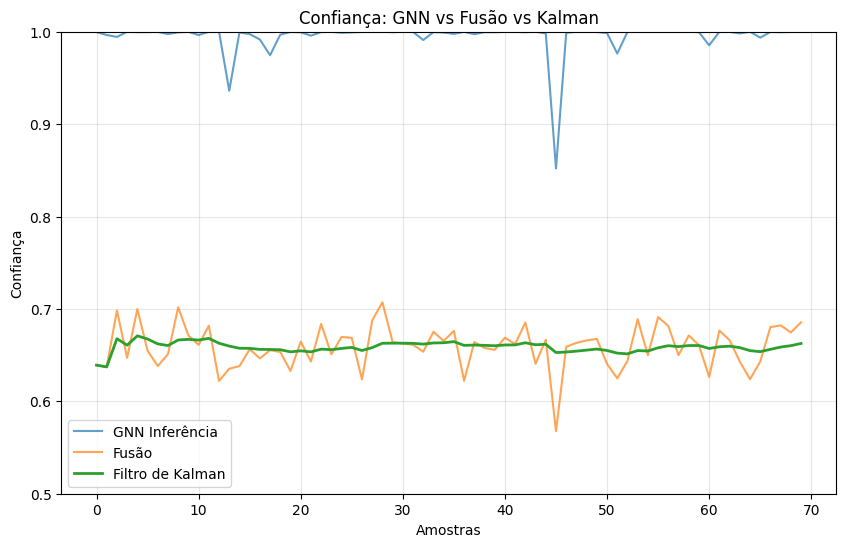

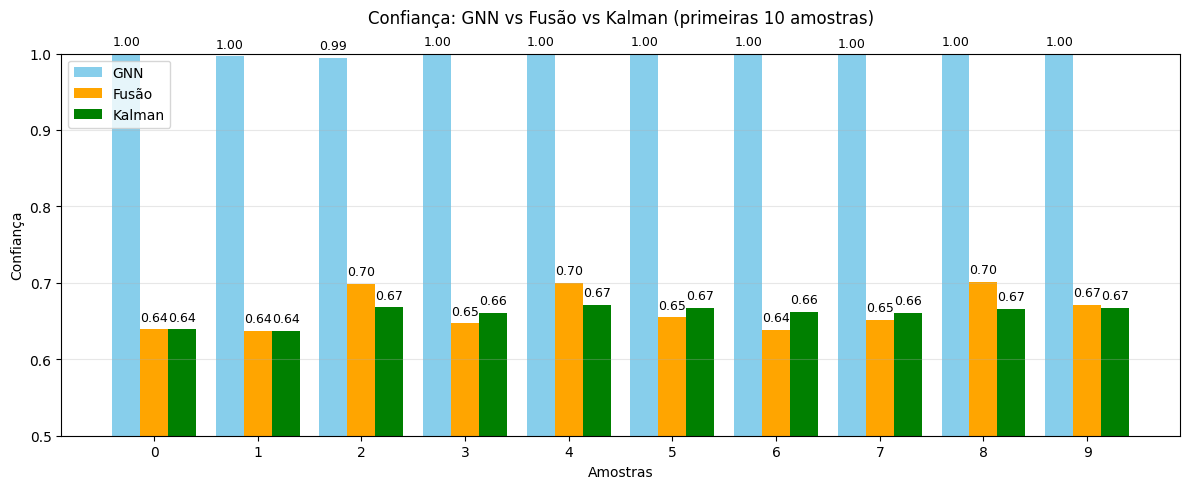

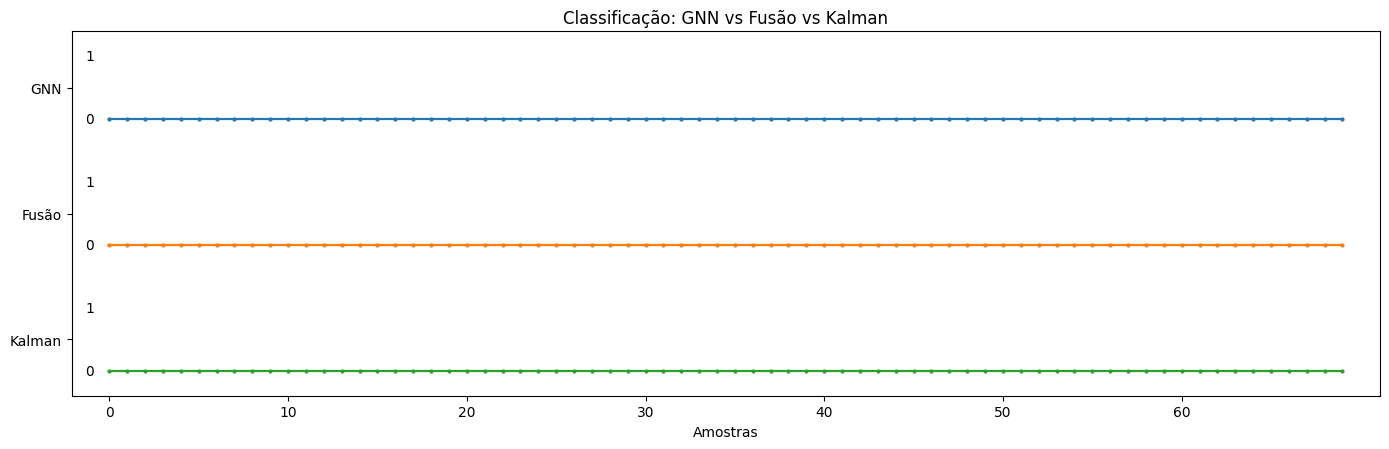

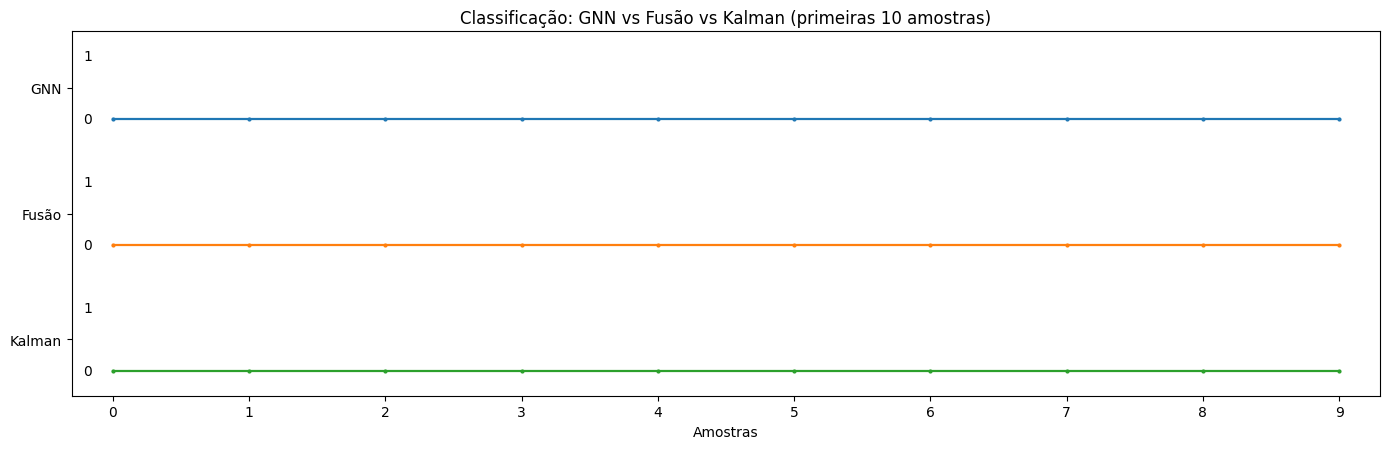

In [19]:
%run 7.results.ipynb

# Best Case

Inputs ótimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") quase perfeitas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") altas.

## Inputs

### Imports

In [20]:
import os
import pandas as pd
import numpy as np

### Parameters

In [21]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [22]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [23]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [24]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [25]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [26]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [27]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7249     0.2907       0.6558    
10       0.3375     0.9582       0.9596    
20       0.1432     0.9672       0.9677    
30       0.0846     0.9734       0.9738    
40       0.0649     0.9778       0.9785    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [28]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-39    2.1   9      0.00   1        Bom      1.00      
-48    1.4   26     0.11   1        Bom      1.00      
-40    2.1   34     0.13   1        Bom      1.00      
-51    2.6   12     0.25   1        Bom      1.00      
-40    2.4   27     0.38   1        Bom      0.99      
-41    1.6   22     0.27   1        Bom      1.00      
-55    1.3   4      0.02   1        Bom      1.00      
-38    3.0   8      0.16   1        Bom      1.00      
-35    1.4   35     0.31   1        Bom      0.99      
-60    1.2   6      0.19   1        Bom      1.00      
-50    2.5   37     0.12   1        Bom      0.99      
-38    1.6   37     0.08   1        Bom      1.00      
-31    2.2   3      0.31   1        Bom      1.00      
-31    1.5   13     0.31   1        Bom      1.00      
-41    3.3   12     0.06   1        Bom      1.00      
-64    3.4   19     0.18   1        Bom      0.9

## Fusion

In [29]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-39    2.1   9      0.00   0.95   0.81   0.85   1        Bom      0.92      
-48    1.4   26     0.11   0.90   0.88   0.78   1        Bom      0.92      
-40    2.1   34     0.13   0.85   0.86   0.71   1        Bom      0.90      
-51    2.6   12     0.25   0.81   0.90   0.82   1        Bom      0.91      
-40    2.4   27     0.38   0.78   0.84   0.89   1        Bom      0.89      
-41    1.6   22     0.27   0.78   0.94   0.82   1        Bom      0.91      
-55    1.3   4      0.02   0.92   0.94   0.85   1        Bom      0.95      
-38    3.0   8      0.16   0.79   0.87   0.76   1        Bom      0.89      
-35    1.4   35     0.31   0.86   0.88   0.78   1        Bom      0.91      
-60    1.2   6      0.19   0.93   0.90   0.86   1        Bom      0.94      
-50    2.5   37     0.12   0.79   0.92   0.81   1        Bom      0.90      
-38  

## Kalman

In [30]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-39    2.1   9      0.00   0.95   0.81   0.85   1        Bom      0.92      
-48    1.4   26     0.11   0.90   0.88   0.78   1        Bom      0.92      
-40    2.1   34     0.13   0.85   0.86   0.71   1        Bom      0.91      
-51    2.6   12     0.25   0.81   0.90   0.82   1        Bom      0.91      
-40    2.4   27     0.38   0.78   0.84   0.89   1        Bom      0.90      
-41    1.6   22     0.27   0.78   0.94   0.82   1        Bom      0.91      
-55    1.3   4      0.02   0.92   0.94   0.85   1        Bom      0.91      
-38    3.0   8      0.16   0.79   0.87   0.76   1        Bom      0.91      
-35    1.4   35     0.31   0.86   0.88   0.78   1        Bom      0.91      
-60    1.2   6      0.19   0.93   0.90   0.86   1        Bom      0.91      
-50    2.5   37     0.12   0.79   0.92   0.81   1        Bom      0.91      


## Resuts

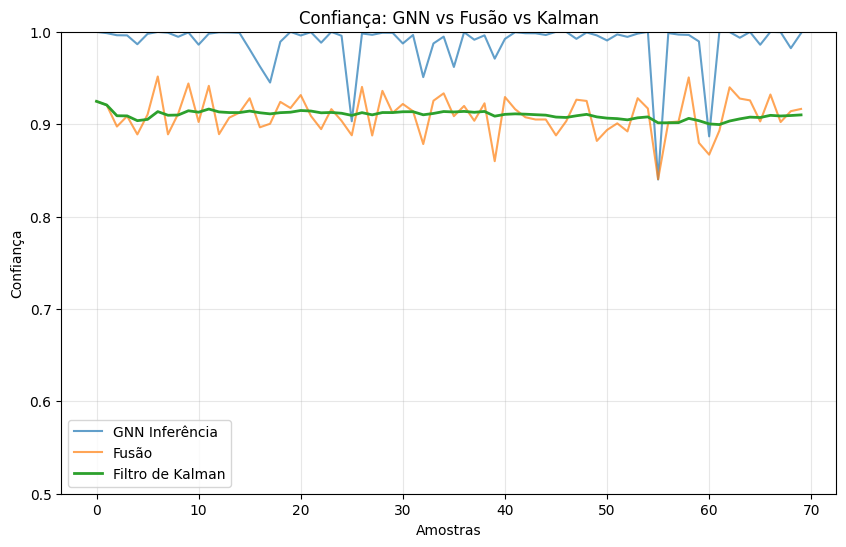

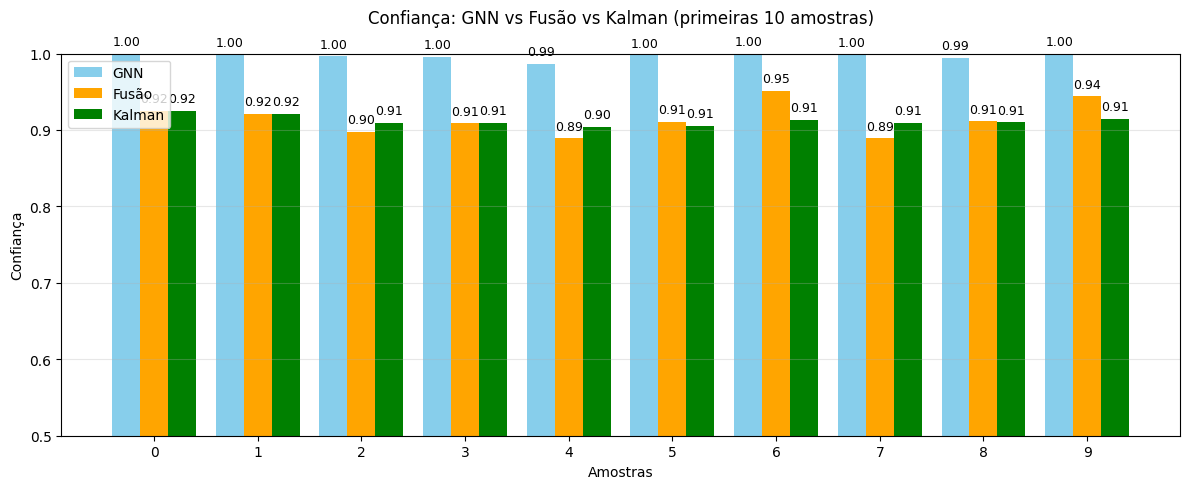

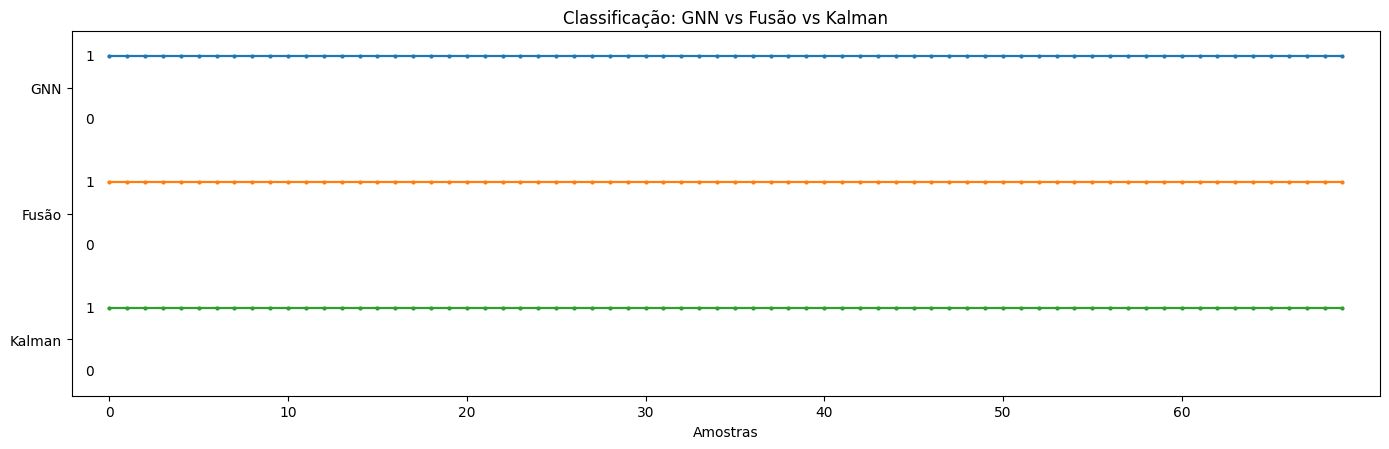

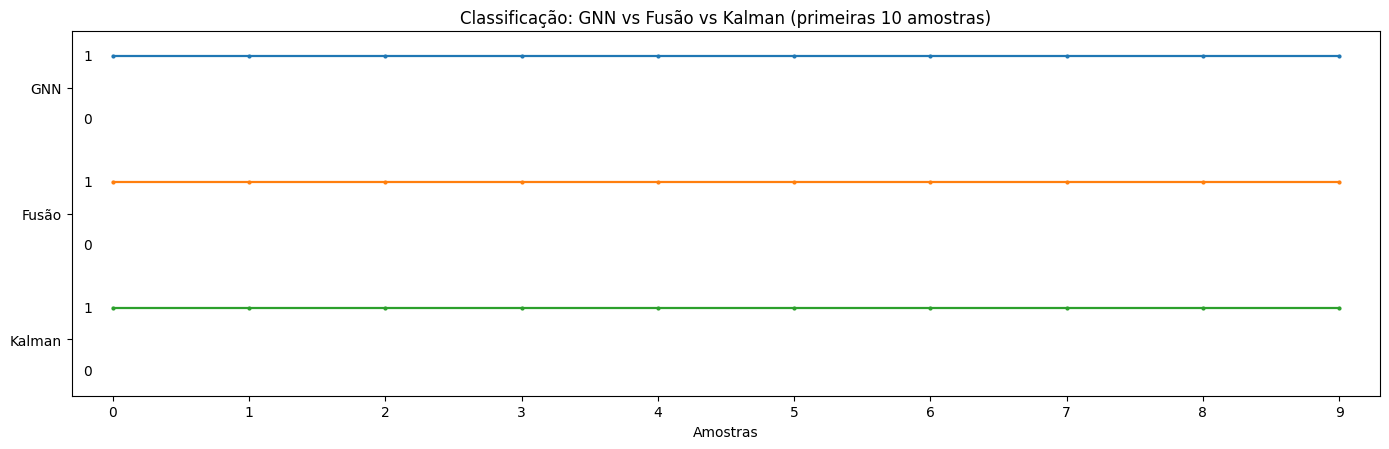

In [31]:
%run 7.results.ipynb

# Good Metrics and Bad RADNET

Métricas da rede ("rssi", "etx", "delay", "busy_fraction") boas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") ruins.

## Inputs

### Imports

In [32]:
import os
import pandas as pd
import numpy as np

### Parameters

In [33]:
num_samples = 70 # quantidade de exemplos

### Good Metrics and Bad RADNET

In [34]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [35]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [36]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [37]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [38]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [39]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7245     0.4891       0.6012    
10       0.3413     0.9741       0.9738    
20       0.1367     0.9752       0.9750    
30       0.0729     0.9784       0.9786    
40       0.0545     0.9820       0.9816    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [40]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-40    2.0   10     0.35   1        Bom      1.00      
-43    3.9   13     0.23   1        Bom      0.99      
-45    2.5   36     0.15   1        Bom      0.99      
-37    3.2   14     0.19   1        Bom      1.00      
-42    1.9   17     0.04   1        Bom      1.00      
-62    3.2   22     0.11   1        Bom      0.99      
-40    2.0   6      0.14   1        Bom      1.00      
-32    1.3   8      0.12   1        Bom      1.00      
-37    1.1   5      0.15   1        Bom      1.00      
-35    1.6   2      0.09   1        Bom      1.00      
-63    1.7   2      0.18   1        Bom      1.00      
-43    1.3   7      0.10   1        Bom      1.00      
-63    1.7   16     0.27   1        Bom      0.99      
-60    3.2   5      0.18   1        Bom      1.00      
-48    2.5   3      0.30   1        Bom      1.00      
-48    2.3   28     0.39   1        Bom      0.9

## Fusion

In [41]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-40    2.0   10     0.35   0.49   0.52   0.51   1        Bom      0.70      
-43    3.9   13     0.23   0.47   0.57   0.47   1        Bom      0.70      
-45    2.5   36     0.15   0.48   0.51   0.64   1        Bom      0.71      
-37    3.2   14     0.19   0.48   0.51   0.47   1        Bom      0.69      
-42    1.9   17     0.04   0.57   0.65   0.57   1        Bom      0.76      
-62    3.2   22     0.11   0.53   0.55   0.63   1        Bom      0.73      
-40    2.0   6      0.14   0.52   0.52   0.54   1        Bom      0.72      
-32    1.3   8      0.12   0.60   0.60   0.51   1        Bom      0.75      
-37    1.1   5      0.15   0.58   0.54   0.53   1        Bom      0.73      
-35    1.6   2      0.09   0.45   0.54   0.64   1        Bom      0.71      
-63    1.7   2      0.18   0.61   0.56   0.60   1        Bom      0.75      
-43  

## Kalman

In [42]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-40    2.0   10     0.35   0.49   0.52   0.51   1        Bom      0.70      
-43    3.9   13     0.23   0.47   0.57   0.47   1        Bom      0.70      
-45    2.5   36     0.15   0.48   0.51   0.64   1        Bom      0.70      
-37    3.2   14     0.19   0.48   0.51   0.47   1        Bom      0.70      
-42    1.9   17     0.04   0.57   0.65   0.57   1        Bom      0.72      
-62    3.2   22     0.11   0.53   0.55   0.63   1        Bom      0.72      
-40    2.0   6      0.14   0.52   0.52   0.54   1        Bom      0.72      
-32    1.3   8      0.12   0.60   0.60   0.51   1        Bom      0.72      
-37    1.1   5      0.15   0.58   0.54   0.53   1        Bom      0.73      
-35    1.6   2      0.09   0.45   0.54   0.64   1        Bom      0.72      
-63    1.7   2      0.18   0.61   0.56   0.60   1        Bom      0.73      


## Results

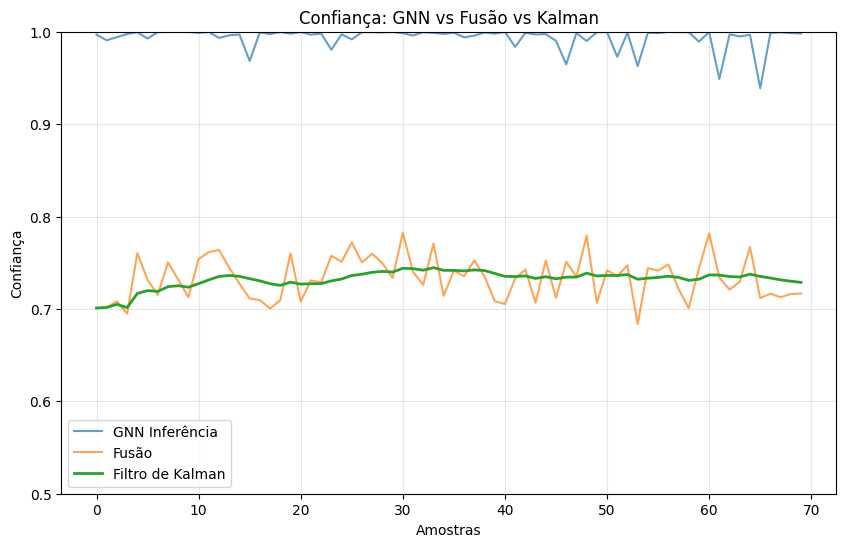

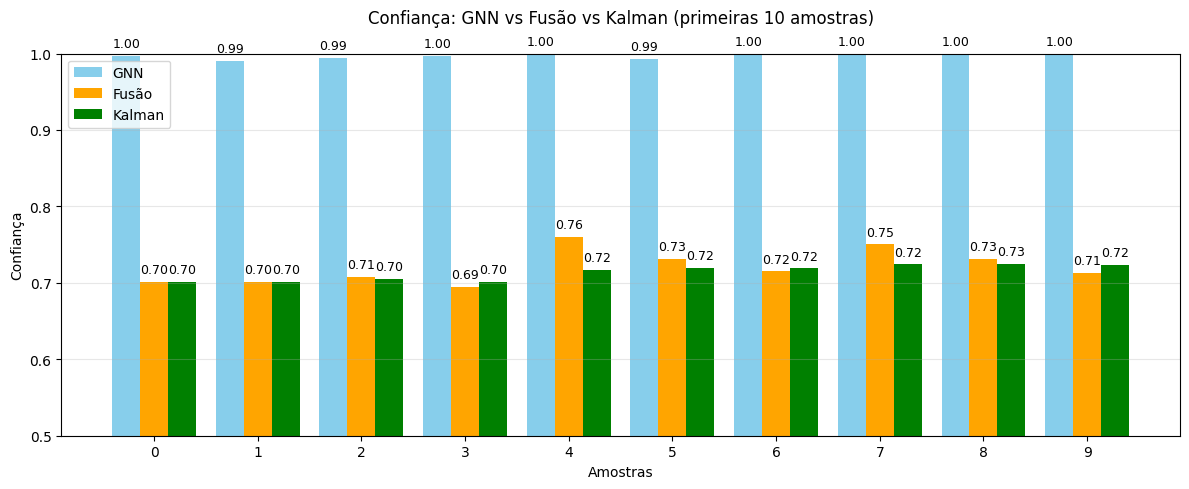

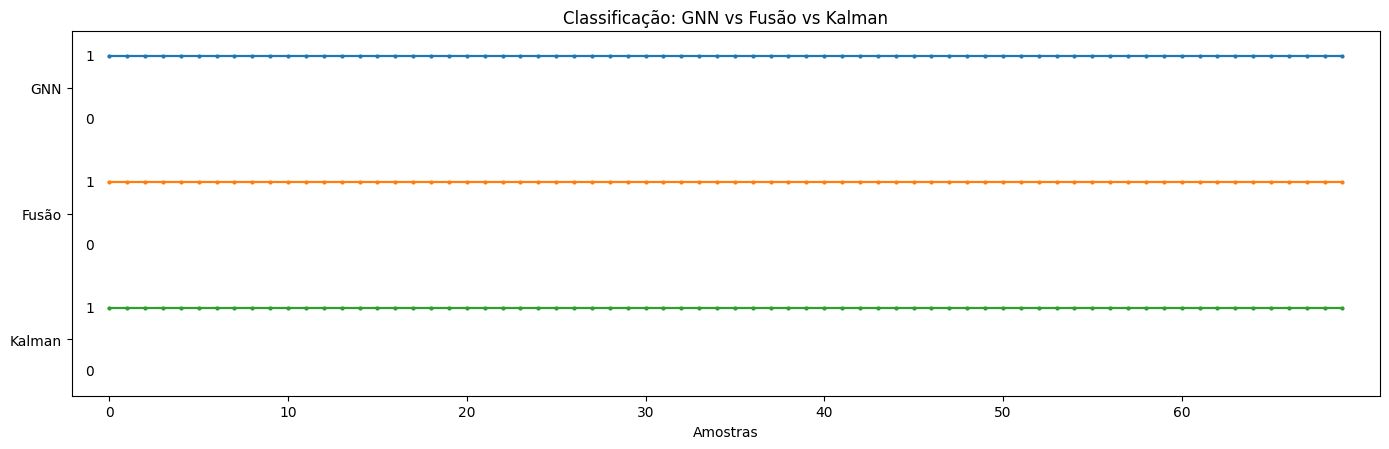

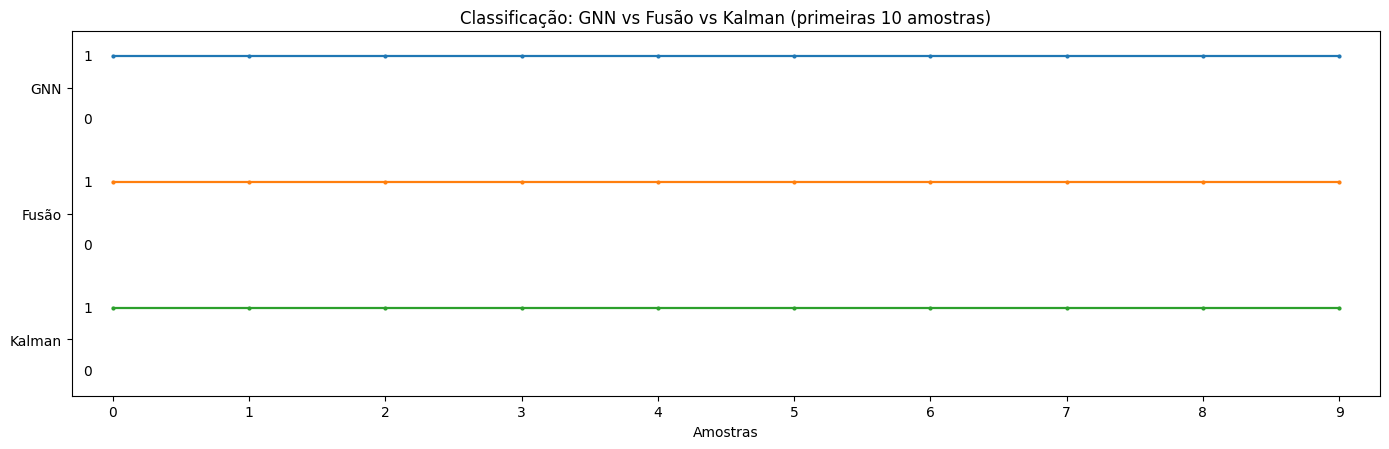

In [43]:
%run 7.results.ipynb

# Bad Metrics and Good RADNET

Métricas da rede ("rssi", "etx", "delay", "busy_fraction") ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") boas.

## Imputs

### Impots

In [44]:
import os
import pandas as pd
import numpy as np

### Parameters

In [45]:
num_samples = 70 # quantidade de exemplos

### Bad Metrics and Good RADNET

In [46]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [47]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [48]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [49]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [50]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [51]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.5420     0.8904       0.9176    
10       0.2550     0.9533       0.9544    
20       0.1268     0.9621       0.9634    
30       0.0830     0.9705       0.9711    
40       0.0630     0.9766       0.9778    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [52]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-86    7.6   79     0.94   0        Ruim     1.00      
-87    8.1   40     0.60   0        Ruim     1.00      
-77    8.8   60     0.57   0        Ruim     1.00      
-94    8.1   87     0.31   0        Ruim     1.00      
-78    4.4   46     0.46   0        Ruim     0.98      
-84    5.4   87     0.50   0        Ruim     1.00      
-75    4.2   62     0.66   0        Ruim     1.00      
-63    9.3   71     0.79   0        Ruim     1.00      
-62    9.8   98     0.89   0        Ruim     1.00      
-90    5.0   70     0.84   0        Ruim     1.00      
-91    6.3   93     0.80   0        Ruim     1.00      
-88    7.6   73     0.75   0        Ruim     1.00      
-71    7.8   50     0.58   0        Ruim     1.00      
-87    5.1   87     0.31   0        Ruim     1.00      
-73    8.8   77     0.81   0        Ruim     1.00      
-87    8.3   75     0.88   0        Ruim     1.0

## Fusion

In [53]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-86    7.6   79     0.94   0.80   0.94   0.89   1        Bom      0.52      
-87    8.1   40     0.60   0.95   0.87   0.74   1        Bom      0.53      
-77    8.8   60     0.57   0.81   0.90   0.84   1        Bom      0.51      
-94    8.1   87     0.31   0.81   0.90   0.82   1        Bom      0.51      
-78    4.4   46     0.46   0.93   0.83   0.85   1        Bom      0.53      
-84    5.4   87     0.50   0.92   0.95   0.90   1        Bom      0.56      
-75    4.2   62     0.66   0.82   0.90   0.89   1        Bom      0.52      
-63    9.3   71     0.79   0.86   0.89   0.81   1        Bom      0.52      
-62    9.8   98     0.89   0.76   0.93   0.87   1        Bom      0.51      
-90    5.0   70     0.84   0.80   0.88   0.80   0        Ruim     0.50      
-91    6.3   93     0.80   0.82   0.92   0.73   1        Bom      0.51      
-88  

## Kalman

In [54]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-86    7.6   79     0.94   0.80   0.94   0.89   1        Bom      0.52      
-87    8.1   40     0.60   0.95   0.87   0.74   1        Bom      0.53      
-77    8.8   60     0.57   0.81   0.90   0.84   1        Bom      0.52      
-94    8.1   87     0.31   0.81   0.90   0.82   1        Bom      0.52      
-78    4.4   46     0.46   0.93   0.83   0.85   1        Bom      0.52      
-84    5.4   87     0.50   0.92   0.95   0.90   1        Bom      0.53      
-75    4.2   62     0.66   0.82   0.90   0.89   1        Bom      0.53      
-63    9.3   71     0.79   0.86   0.89   0.81   1        Bom      0.53      
-62    9.8   98     0.89   0.76   0.93   0.87   1        Bom      0.52      
-90    5.0   70     0.84   0.80   0.88   0.80   1        Bom      0.52      
-91    6.3   93     0.80   0.82   0.92   0.73   1        Bom      0.52      


## Results

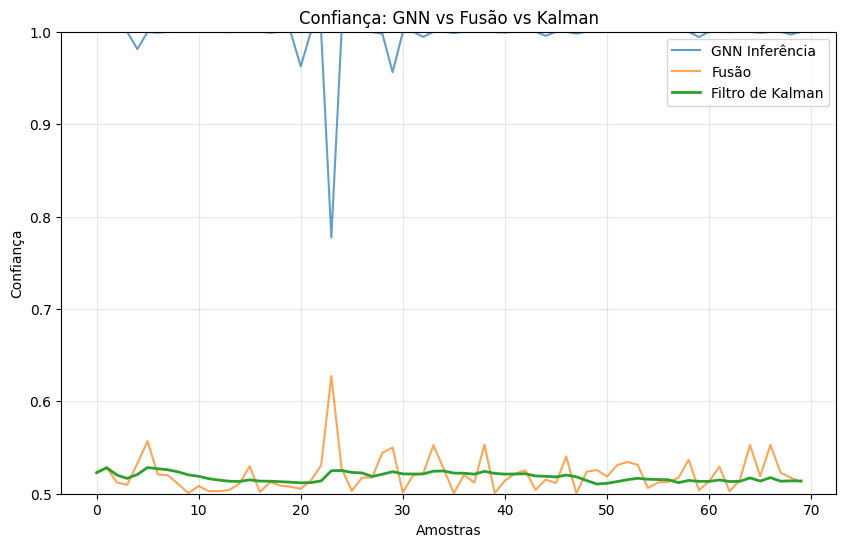

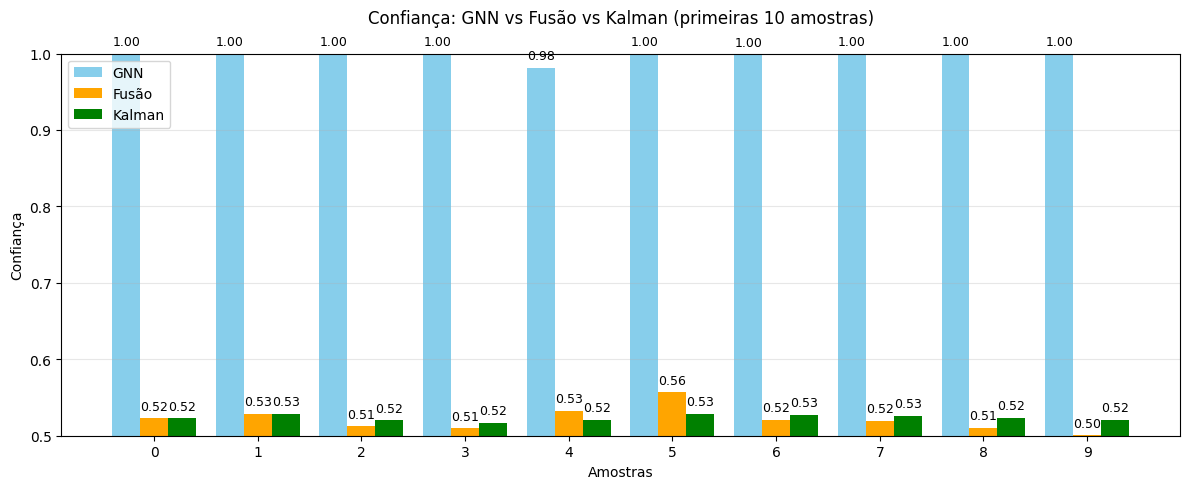

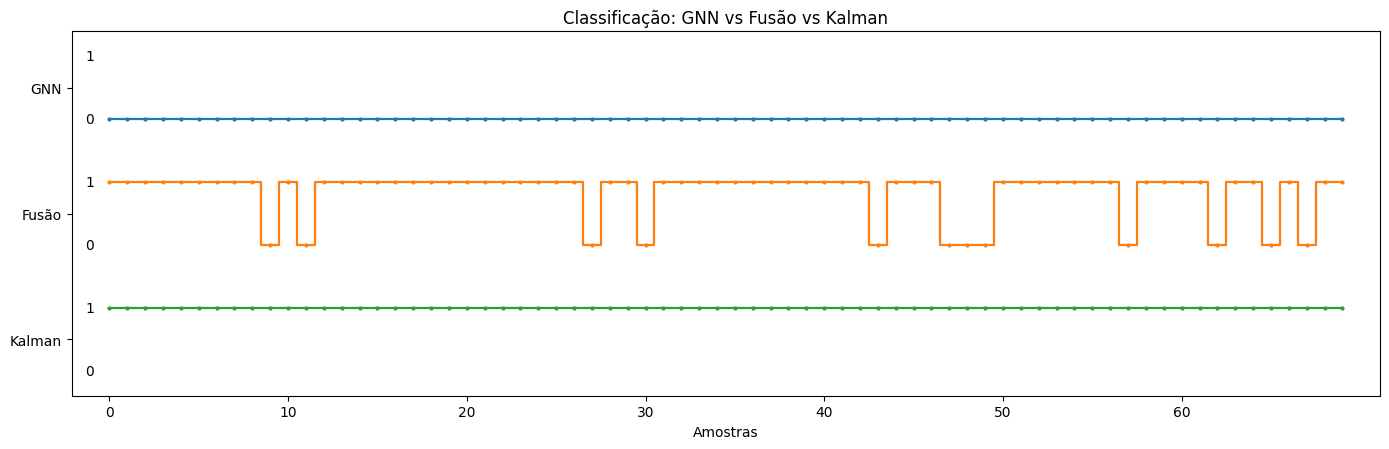

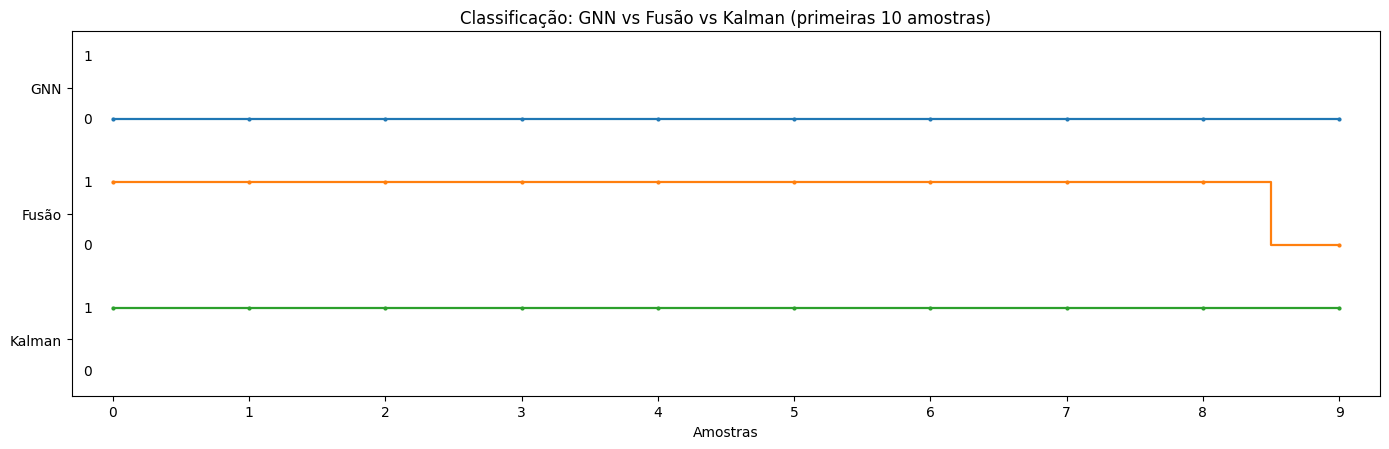

In [55]:
%run 7.results.ipynb